Import packages

In [89]:
import pandas as pd

Import datsets

In [90]:
hurricane_data = pd.read_csv('FL_Hurricanes_2000_2024.csv', on_bad_lines='skip')
icestorm_data = pd.read_csv('NY_Icestrorm_2000_2024.csv', on_bad_lines='skip')
home_data = pd.read_csv('home_insurace_premiums.csv', on_bad_lines='skip')
commercial_data = pd.read_csv('commercial _insurance_premiums.csv', on_bad_lines='skip')
inflation_data = pd.read_csv('US_Inflation.csv', on_bad_lines='skip')

Data tidying and recoding

In [91]:
# check for missing values
print("Hurricane data missing values:")
print(hurricane_data.isnull().sum())

print("\nIce Storm data missing values:")
print(icestorm_data.isnull().sum())

print("\nHome insurance premiums missing values:")
print(home_data.isnull().sum())

print("\nCommercial insurance premiums missing values:")
print(commercial_data.isnull().sum())

print("\nInflation data missing values:")
print(inflation_data.isnull().sum())

Hurricane data missing values:
EVENT_ID                 0
CZ_NAME_STR              0
BEGIN_LOCATION           0
BEGIN_DATE               0
BEGIN_TIME               0
EVENT_TYPE               0
MAGNITUDE                0
TOR_F_SCALE              0
DEATHS_DIRECT            0
INJURIES_DIRECT          0
DAMAGE_PROPERTY_NUM      0
DAMAGE_CROPS_NUM         0
STATE_ABBR               0
CZ_TIMEZONE              0
MAGNITUDE_TYPE           0
EPISODE_ID               0
CZ_TYPE                  0
CZ_FIPS                  0
WFO                      0
INJURIES_INDIRECT        0
DEATHS_INDIRECT          0
SOURCE                   0
FLOOD_CAUSE              0
TOR_LENGTH               0
TOR_WIDTH                0
BEGIN_RANGE              0
BEGIN_AZIMUTH            0
END_RANGE                0
END_AZIMUTH              0
END_LOCATION             0
END_DATE                 0
END_TIME                 0
BEGIN_LAT                0
BEGIN_LON              159
END_LAT                 22
END_LON                 

In [92]:
# Summary of each dataset
print("Hurricane Data summary:")
print(hurricane_data.info())
print(hurricane_data.describe())

print("\nIce Storm data summary:")
print(icestorm_data.info())
print(icestorm_data.describe())

print("\nHome insurance data summary:")
print(home_data.info())
print(home_data.describe())

print("\nCommercial insurance data summary:")
print(commercial_data.info())
print(commercial_data.describe())

print("\nInflation data summary:")
print(inflation_data.info())
print(inflation_data.describe())

Hurricane Data summary:
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 265 entries, (np.int64(5157574), 'LEE (ZONE)', ' ') to (np.int64(1219079), 'INLAND FLAGLER (ZONE)', ' ')
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   EVENT_ID             265 non-null    object 
 1   CZ_NAME_STR          265 non-null    int64  
 2   BEGIN_LOCATION       265 non-null    object 
 3   BEGIN_DATE           265 non-null    object 
 4   BEGIN_TIME           265 non-null    object 
 5   EVENT_TYPE           265 non-null    int64  
 6   MAGNITUDE            265 non-null    int64  
 7   TOR_F_SCALE          265 non-null    int64  
 8   DEATHS_DIRECT        265 non-null    int64  
 9   INJURIES_DIRECT      265 non-null    object 
 10  DAMAGE_PROPERTY_NUM  265 non-null    object 
 11  DAMAGE_CROPS_NUM     265 non-null    object 
 12  STATE_ABBR           265 non-null    int64  
 13  CZ_TIMEZONE          265 non-null

Rename and drop variables

In [93]:
inflation_data.rename(columns={"FPCPITOTLZGUSA": "inflation_rate"}, inplace=True)

home_data.rename(columns={"PCU9241269241262": "Home_Insurance_PPI"}, inplace=True)

commercial_data.rename(columns={"PCU9241269241265": "Commercial_Insurance_PPI"}, inplace=True)

hurricane_data.rename(columns={
    "EVENT_ID": "hurricane_id",
    "CZ_NAME_STR": "cz_name_hurricanes",
    "BEGIN_DATE": "observation_date",
    "DEATHS_DIRECT": "hurricane_deaths",
    "INJURIES_DIRECT": "hurricane_injuries",
    "DAMAGE_PROPERTY_NUM": "hurricane_property_damage",
    "DAMAGE_CROPS_NUM": "hurricane_crop_damaged",
    "STATE_ABBR": "hurricane_state",
    "END_LAT": "hurricane_endlat"
}, inplace=True)

hurricane_data.drop(columns=[
    "BEGIN_LOCATION", "BEGIN_TIME", "EVENT_TYPE", "MAGNITUDE", "TOR_F_SCALE", 
    "CZ_TIMEZONE", "MAGNITUDE_TYPE", "EPISODE_ID", "CZ_TYPE", "CZ_FIPS", "WFO", 
    "INJURIES_INDIRECT", "DEATHS_INDIRECT", "SOURCE", "FLOOD_CAUSE", "TOR_LENGTH", 
    "TOR_WIDTH", "BEGIN_RANGE", "BEGIN_AZIMUTH", "END_RANGE", "END_AZIMUTH", 
    "END_LOCATION", "END_DATE", "END_TIME", "BEGIN_LAT", "BEGIN_LON", "END_LON", 
    "EVENT_NARRATIVE", "EPISODE_NARRATIVE", "ABSOLUTE_ROWNUMBER"
], inplace=True, errors='ignore')

icestorm_data.rename(columns={
    "EVENT_ID": "ice_id",
    "CZ_NAME_STR": "cz_name_ice",
    "BEGIN_DATE": "observation_date",
    "DEATHS_DIRECT": "ice_deaths",
    "INJURIES_DIRECT": "ice_injuries",
    "DAMAGE_PROPERTY_NUM": "ice_property_damage",
    "DAMAGE_CROPS_NUM": "ice_crop_damaged",
    "STATE_ABBR": "ice_state",
    "END_LAT": "ice_endlat"
}, inplace=True)

icestorm_data.drop(columns=[
    "BEGIN_LOCATION", "BEGIN_TIME", "EVENT_TYPE", "MAGNITUDE", "TOR_F_SCALE", 
    "CZ_TIMEZONE", "MAGNITUDE_TYPE", "EPISODE_ID", "CZ_TYPE", "CZ_FIPS", "WFO", 
    "INJURIES_INDIRECT", "DEATHS_INDIRECT", "SOURCE", "FLOOD_CAUSE", "TOR_LENGTH", 
    "TOR_WIDTH", "BEGIN_RANGE", "BEGIN_AZIMUTH", "END_RANGE", "END_AZIMUTH", 
    "END_LOCATION", "END_DATE", "END_TIME", "BEGIN_LAT", "BEGIN_LON", "END_LON", 
    "EVENT_NARRATIVE", "EPISODE_NARRATIVE", "ABSOLUTE_ROWNUMBER"
], inplace=True, errors='ignore')

Fix date format to be consistant 

In [94]:
# observation_date to standardized datetime format
hurricane_data["observation_date"] = pd.to_datetime(hurricane_data["observation_date"], errors='coerce')
icestorm_data["observation_date"] = pd.to_datetime(icestorm_data["observation_date"], errors='coerce')
home_data["observation_date"] = pd.to_datetime(home_data["observation_date"], errors='coerce')
commercial_data["observation_date"] = pd.to_datetime(commercial_data["observation_date"], errors='coerce')
inflation_data["observation_date"] = pd.to_datetime(inflation_data["observation_date"], errors='coerce')

# check
print("Rows with invalid dates in hurricane_data:", hurricane_data[hurricane_data["observation_date"].isna()])
print("Rows with invalid dates in icestorm_data:", icestorm_data[icestorm_data["observation_date"].isna()])
print("Rows with invalid dates in home_data:", home_data[home_data["observation_date"].isna()])
print("Rows with invalid dates in commercial_data:", commercial_data[commercial_data["observation_date"].isna()])
print("Rows with invalid dates in inflation_data:", inflation_data[inflation_data["observation_date"].isna()])

# drop rows with missing observation dates
hurricane_data.dropna(subset=["observation_date"], inplace=True)
icestorm_data.dropna(subset=["observation_date"], inplace=True)
home_data.dropna(subset=["observation_date"], inplace=True)
commercial_data.dropna(subset=["observation_date"], inplace=True)
inflation_data.dropna(subset=["observation_date"], inplace=True)


Rows with invalid dates in hurricane_data:                                   hurricane_id  cz_name_hurricanes  \
5157574 LEE (ZONE)                  09/17/2000                 330   
5157575 CHARLOTTE (ZONE)            09/17/2000                 400   
5157588 PINELLAS (ZONE)             09/17/2000                 500   
5157580 HIGHLANDS (ZONE)            09/17/2000                 500   
5157584 PASCO (ZONE)                09/17/2000                 500   
...                                        ...                 ...   
1209819 INLAND WAKULLA (ZONE)       09/26/2024                1600   
1209821 LEON (ZONE)                 09/26/2024                1600   
1209825 COASTAL JEFFERSON (ZONE)    09/26/2024                1600   
1213112 COASTAL FLAGLER (ZONE)      10/09/2024                 100   
1219079 INLAND FLAGLER (ZONE)       10/09/2024                 100   

                                  observation_date  hurricane_deaths  \
5157574 LEE (ZONE)                          

clean invalid dates

In [95]:
hurricane_data.dropna(subset=["observation_date"], inplace=True)
icestorm_data.dropna(subset=["observation_date"], inplace=True)
home_data.dropna(subset=["observation_date"], inplace=True)
commercial_data.dropna(subset=["observation_date"], inplace=True)
inflation_data.dropna(subset=["observation_date"], inplace=True)

Merge datasets

In [96]:
merged_data = pd.merge(hurricane_data, icestorm_data, on='observation_date', how='outer')
merged_data = pd.merge(merged_data, home_data, on='observation_date', how='outer')
merged_data = pd.merge(merged_data, commercial_data, on='observation_date', how='outer')
merged_data = pd.merge(merged_data, inflation_data, on='observation_date', how='outer')

#check merged dataset 
print(merged_data.shape)  
print(merged_data.head())


(604, 20)
  hurricane_id  cz_name_hurricanes observation_date  hurricane_deaths  \
0          NaN                 NaN       1960-01-01               NaN   
1          NaN                 NaN       1961-01-01               NaN   
2          NaN                 NaN       1962-01-01               NaN   
3          NaN                 NaN       1963-01-01               NaN   
4          NaN                 NaN       1964-01-01               NaN   

  hurricane_injuries hurricane_property_damage hurricane_crop_damaged  \
0                NaN                       NaN                    NaN   
1                NaN                       NaN                    NaN   
2                NaN                       NaN                    NaN   
3                NaN                       NaN                    NaN   
4                NaN                       NaN                    NaN   

   hurricane_state hurricane_endlat  ice_id cz_name_ice  ice_deaths  \
0              NaN              NaN     N

Add Year column for easier testing of data between all datasets

In [97]:
merged_data['year'] = merged_data['observation_date'].dt.year

print(merged_data.columns) 


Index(['hurricane_id', 'cz_name_hurricanes', 'observation_date',
       'hurricane_deaths', 'hurricane_injuries', 'hurricane_property_damage',
       'hurricane_crop_damaged', 'hurricane_state', 'hurricane_endlat',
       'ice_id', 'cz_name_ice', 'ice_deaths', 'ice_injuries',
       'ice_property_damage', 'ice_crop_damaged', 'ice_state', 'ice_endlat',
       'Home_Insurance_PPI', 'Commercial_Insurance_PPI', 'inflation_rate',
       'year'],
      dtype='object')


Inflation Rate Data Analysis and Visualization

   year  inflation_rate
0  1960        1.457976
1  1961        1.070724
2  1962        1.198773
3  1963        1.239669
4  1964        1.278912


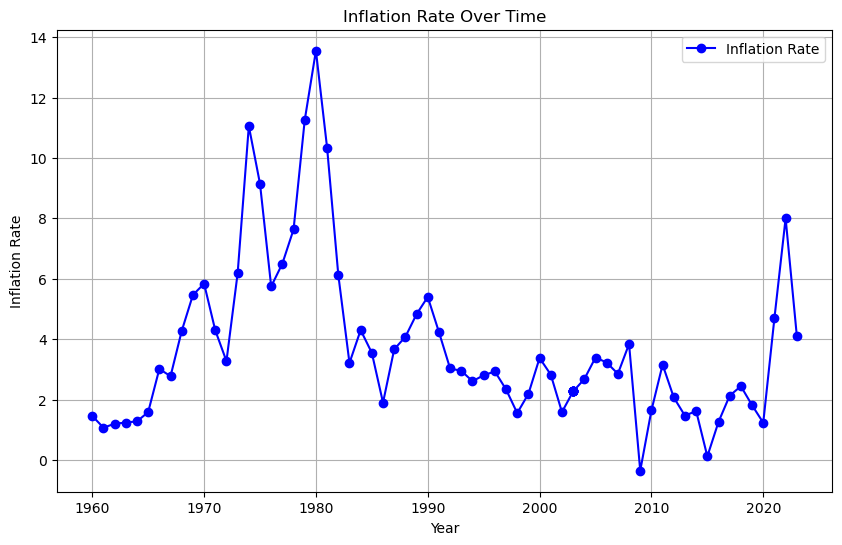

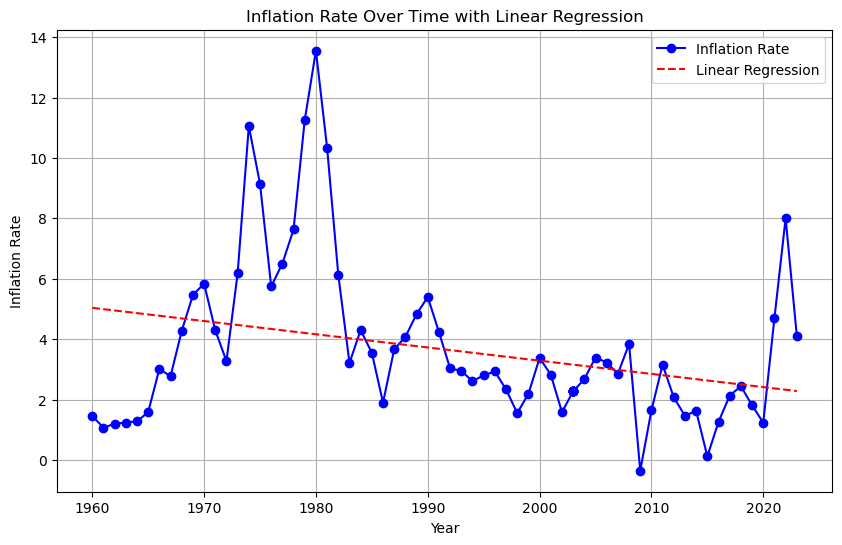

Inflation Linear Regression Slope: -0.043720424328710594


In [98]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

print(merged_data[['year', 'inflation_rate']].head())
merged_data = merged_data.dropna(subset=['inflation_rate'])

# inflation rate over time
plt.figure(figsize=(10, 6))
plt.plot(merged_data['year'], merged_data['inflation_rate'], marker='o', linestyle='-', color='b', label='Inflation Rate')
plt.title('Inflation Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.grid(True)
plt.legend()
plt.show()


# linear regression
X = merged_data[['year']]  # independent variable (year)
y = merged_data['inflation_rate']  # dependent variable (inflation_rate)

inflation_model = LinearRegression()
inflation_model.fit(X, y)

merged_data['predicted_inflation_rate'] = inflation_model.predict(X)

# plot inflation rate with the linear regression line
plt.figure(figsize=(10, 6))
plt.plot(merged_data['year'], merged_data['inflation_rate'], marker='o', linestyle='-', color='b', label='Inflation Rate')
plt.plot(merged_data['year'], merged_data['predicted_inflation_rate'], linestyle='--', color='r', label='Linear Regression')
plt.title('Inflation Rate Over Time with Linear Regression')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.grid(True)
plt.legend()
plt.show()

print(f"Inflation Linear Regression Slope: {inflation_model.coef_[0]}")



Property Insurance Rates

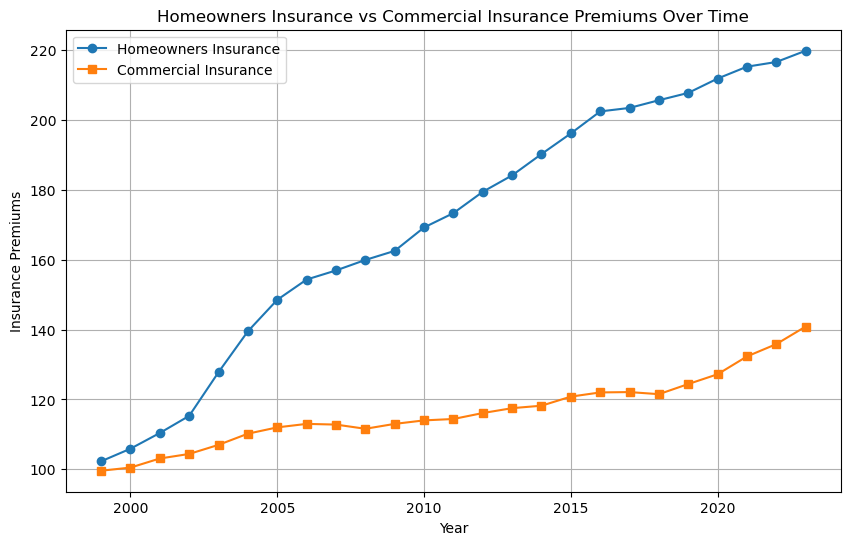

In [99]:
home_insurance_by_year = merged_data.groupby('year')['Home_Insurance_PPI'].mean()
commercial_insurance_by_year = merged_data.groupby('year')['Commercial_Insurance_PPI'].mean()

plt.figure(figsize=(10, 6))
plt.plot(home_insurance_by_year.index, home_insurance_by_year.values, marker='o', label='Homeowners Insurance')
plt.plot(commercial_insurance_by_year.index, commercial_insurance_by_year.values, marker='s', label='Commercial Insurance')

plt.title('Homeowners Insurance vs Commercial Insurance Premiums Over Time')
plt.xlabel('Year')
plt.ylabel('Insurance Premiums')
plt.legend()
plt.grid(True)
plt.show()
